In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,0.0,2.0,2.0,...,0.0,NaN,0.0,0.0,0.0,0,0.0,0.0,2.0,0.0
1,1.0,NaN,2.0,0.0,0.0,0.0,3.0,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,0.0,2,2.0,2.0,0.0,7.0
2,2.0,NaN,1.0,0.0,0.0,NaN,3.0,NaN,2.0,0.0,...,0.0,NaN,0.0,2.0,0.0,3,3.0,2.0,0.0,7.0
3,2.0,2.0,2.0,1.0,0.0,NaN,2.0,0.0,NaN,NaN,...,0.0,NaN,0.0,2.0,0.0,2,2.0,2.0,0.0,7.0
4,2.0,2.0,1.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,...,0.0,0.0,0.0,3.0,NaN,2,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,NaN,2.0,1.0,0.0,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,3.0,0.0,0,0.0,3.0,0.0,70.0
354,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0,NaN,1.0,0.0,70.0
355,2.0,NaN,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,2.0,NaN,0,0.0,2.0,0.0,70.0
356,2.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,0,0.0,1.0,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	71
float64		column 2	106
float64		column 3	105
float64		column 4	36
float64		column 5	71
float64		column 6	71
float64		column 7	70
float64		column 8	105
float64		column 9	71
float64		column 10	71
float64		column 11	105
float64		column 12	70
float64		column 13	70
float64		column 14	35
float64		column 15	35
float64		column 16	106
float64		column 17	36
float64		column 18	35
float64		column 19	71
float64		column 20	106
float64		column 21	70
float64		column 22	105
float64		column 23	35
float64		column 24	70
float64		column 25	36
float64		column 26	70
float64		column 27	70
float64		column 28	106
float64		column 29	70
int64		column 30	0
float64		column 31	106
float64		column 32	71
float64		column 33	71
float64		column 34	71


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,287.000000,252.000000,253.000000,322.000000,287.000000,287.000000,288.000000,253.000000,287.000000,287.000000,...,322.000000,288.000000,288.000000,252.000000,288.000000,358.000000,252.000000,287.000000,287.000000,287.000000
mean,2.069686,1.869048,1.588933,1.378882,0.595819,0.432056,0.173611,0.284585,0.557491,0.473868,...,0.385093,0.461806,0.326389,0.920635,0.440972,0.106145,0.087302,1.902439,0.567944,36.257840
std,0.643978,0.651931,0.824354,1.096264,0.875292,0.965172,0.582316,0.738698,0.925175,0.851888,...,0.850597,0.854543,0.812188,1.083032,0.953622,0.455180,0.428466,0.656512,1.116352,14.747872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,26.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,47.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,70.000000


<AxesSubplot:>

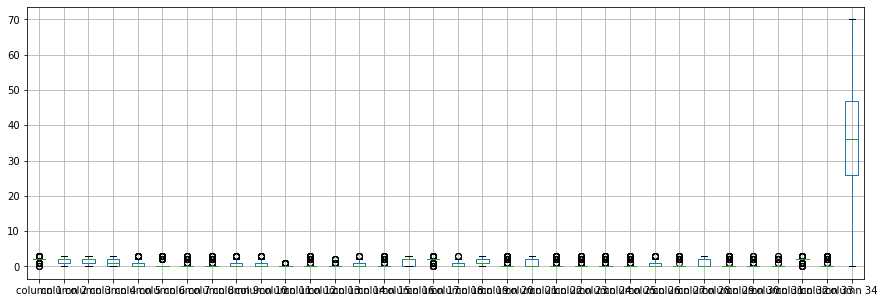

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.069686
column 2      1.869048
column 3      1.588933
column 4      1.378882
column 5      0.595819
column 6      0.432056
column 7      0.173611
column 8      0.284585
column 9      0.557491
column 10     0.473868
column 11     0.106719
column 12     0.361111
column 13     0.128472
column 14     0.523220
column 15     0.291022
column 16     1.357143
column 17     1.953416
column 18     0.473684
column 19     1.313589
column 20     0.519841
column 21     0.934028
column 22     0.470356
column 23     0.312693
column 24     0.343750
column 25     0.385093
column 26     0.461806
column 27     0.326389
column 28     0.920635
column 29     0.440972
column 30     0.106145
column 31     0.087302
column 32     1.902439
column 33     0.567944
column 34    36.257840
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.389947,0.207341,-0.004758,0.016604,-0.001613,-0.036565,-0.012874,0.147147,0.274254,...,-0.021909,0.155943,-0.040843,0.048626,-0.002465,0.009983,-0.016729,-0.112690,-0.001816,0.047151
column 2,0.389947,1.000000,0.343070,-0.037404,-0.065342,-0.066526,-0.101239,-0.034945,0.249520,0.210439,...,-0.109662,0.193123,-0.092268,-0.036962,-0.094929,-0.044377,0.003566,-0.005912,-0.173944,-0.076938
column 3,0.207341,0.343070,1.000000,-0.043472,0.156428,0.268664,-0.132462,0.276529,0.254753,0.269253,...,0.286544,0.365175,0.240439,-0.290332,0.237933,-0.019394,-0.123671,0.073332,0.321515,0.227465
column 4,-0.004758,-0.037404,-0.043472,1.000000,0.239166,0.392448,-0.167151,0.357151,-0.243954,-0.168490,...,0.355296,-0.209383,0.334805,-0.032658,0.347970,-0.175559,-0.180290,0.050922,0.368348,0.064451
column 5,0.016604,-0.065342,0.156428,0.239166,1.000000,0.427959,-0.194791,0.380120,-0.051589,-0.000079,...,0.424054,0.003499,0.398637,-0.002861,0.411240,-0.145914,-0.154429,0.154474,0.328053,0.078575
column 6,-0.001613,-0.066526,0.268664,0.392448,0.427959,1.000000,-0.136295,0.891956,-0.244787,-0.240033,...,0.866985,-0.157785,0.942795,0.089025,0.900830,-0.085064,-0.081273,0.255906,0.883735,0.121351
column 7,-0.036565,-0.101239,-0.132462,-0.167151,-0.194791,-0.136295,1.000000,-0.122619,0.219740,0.052068,...,-0.146719,-0.141209,-0.135295,0.041781,-0.139846,0.806729,0.838073,-0.004403,-0.142064,-0.451341
column 8,-0.012874,-0.034945,0.276529,0.357151,0.380120,0.891956,-0.122619,1.000000,-0.247769,-0.218393,...,0.895799,-0.110719,0.922339,0.067327,0.872403,-0.061143,-0.085675,0.233732,0.880260,0.154996
column 9,0.147147,0.249520,0.254753,-0.243954,-0.051589,-0.244787,0.219740,-0.247769,1.000000,0.704461,...,-0.253517,0.543336,-0.252328,-0.382257,-0.256059,0.158791,0.109382,-0.145206,-0.247258,-0.137838
column 10,0.274254,0.210439,0.269253,-0.168490,-0.000079,-0.240033,0.052068,-0.218393,0.704461,1.000000,...,-0.259244,0.534236,-0.253808,-0.419220,-0.247988,-0.045947,0.014623,-0.054870,-0.232110,-0.043464


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+89,34+89+89,34+89+89+89,34+89+89+89+89,34+89+89+89+89+89,34+89+89+89+89+89+89,34+89+89+89+89+89+89+89,34+89+89+89+89+89+89,34+89+89+89+89+89,34+89+89+89+89,34+89+89+89,34+89+89,34+89,34], vae_layer = False, seed = 89)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 59.814025532115586
Epoch: 1 , loss: 59.60267379067161
Epoch: 2 , loss: 59.25090824473988
Epoch: 3 , loss: 58.805857224897906
Epoch: 4 , loss: 57.52810842340643
Epoch: 5 , loss: 56.68716049194336
Epoch: 6 , loss: 55.55391519719904
Epoch: 7 , loss: 55.20949658480558
Epoch: 8 , loss: 54.542856736616656
Epoch: 9 , loss: 54.32775722850453
Epoch: 10 , loss: 54.21252562782981
Epoch: 11 , loss: 53.46923047846014
Epoch: 12 , loss: 53.26640562577681
Epoch: 13 , loss: 52.67942879416726
Epoch: 14 , loss: 52.48518128828569
Epoch: 15 , loss: 52.16250280900435
Epoch: 16 , loss: 52.0600116036155
Epoch: 17 , loss: 51.80190467834473
Epoch: 18 , loss: 51.58057923750444
Epoch: 19 , loss: 51.27264959161932
Epoch: 20 , loss: 50.89603025263006
Epoch: 21 , loss: 50.903132351962
Epoch: 22 , loss: 51.015464782714844
Epoch: 23 , loss: 50.65026439319957
Epoch: 24 , loss: 50.273914163762875
Epoch: 25 , loss: 49.78134883533824
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.656150
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.029908
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.561250
column 27     0.000000
column 28     0.863451
column 29     0.000000
column 30     0.000000
column 31    -0.021974
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.394657,0.317385,0.000000,0.0,0.000000,0.000000,0.064644,0.000000,0.000000,0.000000,...,0.0,0.347529,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.0,0.000000
1,0.000000,0.921219,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-2.262662,0.000000,...,0.0,0.722444,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.0,0.000000
2,0.000000,-0.752375,0.000000,0.0,0.000000,0.372829,0.000000,0.216631,0.000000,0.000000,...,0.0,0.385361,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.418082,0.000000,0.000000,-1.617834,-1.869662,...,0.0,0.317184,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.267763,0.000000,0.175938,-1.683457,0.256112,...,0.0,0.000000,0.000000,0.00000,0.263385,0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0.000000,2.449775,0.0,0.000000,0.000000,0.000000,0.410318,0.000000,0.737103,...,0.0,0.000000,0.000000,0.00000,0.000000,0,0.000000,0.000000,0.0,0.000000
354,0.000000,-1.724423,-1.071694,0.0,0.000000,0.000000,0.000000,0.165769,-2.701829,-1.777949,...,0.0,0.000000,0.000000,0.00000,0.000000,0,0.004322,0.000000,0.0,0.000000
355,0.000000,0.339044,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.695074,0.365521,0.00000,0.651544,0,0.000000,0.000000,0.0,0.000000
356,0.000000,0.715829,1.469744,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.450300,0.000000,0.74375,0.000000,0,0.000000,0.000000,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(197.74358761350823, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.26085047674658224

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.970669
column 3      0.000000
column 4      0.689238
column 5      0.385361
column 6      0.191843
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.667387
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.784804
column 33     0.000000
column 34    13.029113
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.394657,1.317385,1.000000,1.0,1.000000,0.000000,0.064644,0.000000,2.000000,2.000000,...,0.0,0.347529,0.000000,0.00000,0.000000,0,0.000000,0.000000,2.0,0.000000
1,1.000000,1.921219,2.000000,0.0,0.000000,0.000000,3.000000,0.000000,0.737338,0.000000,...,0.0,0.722444,0.000000,0.00000,0.000000,2,2.000000,2.000000,0.0,7.000000
2,2.000000,1.247625,1.000000,0.0,0.000000,0.372829,3.000000,0.216631,2.000000,0.000000,...,0.0,0.385361,0.000000,2.00000,0.000000,3,3.000000,2.000000,0.0,7.000000
3,2.000000,2.000000,2.000000,1.0,0.000000,0.418082,2.000000,0.000000,0.382166,0.130338,...,0.0,0.317184,0.000000,2.00000,0.000000,2,2.000000,2.000000,0.0,7.000000
4,2.000000,2.000000,1.000000,0.0,0.000000,0.267763,2.000000,0.175938,0.316543,0.256112,...,0.0,0.000000,0.000000,3.00000,0.263385,2,2.000000,2.000000,0.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2.000000,2.449775,2.0,1.000000,0.000000,0.000000,0.410318,0.000000,0.737103,...,0.0,0.000000,0.000000,3.00000,0.000000,0,0.000000,3.000000,0.0,70.000000
354,2.000000,1.275577,0.928306,0.0,0.000000,0.000000,0.000000,0.165769,0.298171,0.222051,...,0.0,0.000000,0.000000,0.00000,0.000000,0,0.004322,1.000000,0.0,70.000000
355,2.000000,2.339044,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.695074,0.365521,2.00000,0.651544,0,0.000000,2.000000,0.0,70.000000
356,2.000000,1.715829,1.469744,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.450300,0.000000,0.74375,0.000000,0,0.000000,1.000000,0.0,70.000000


In [21]:
imputations[-1].to_excel("DERM_NL_20(imp).xlsx", index=False, header=False)